In [ ]:
[]

In [1]:
 ! pip install -q kaggle
 ! pip install --upgrade kaggle

Requirement already up-to-date: kaggle in /usr/local/lib/python3.7/dist-packages (1.5.12)


In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kaushaltalapady","key":"f39751c8ff434200b9e271c19590c4e0"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [6]:
 ! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              223KB  2021-04-19 17:31:00           3234  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-02-17 16:10:44           1898  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27           1263  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Job Listing 2020                     42MB  2021-03-05 06:59:52            375  
imsparsh/musicnet-dataset                                   MusicNet Dataset

In [7]:
!kaggle competitions download -c allstate-claims-severity

 53% 5.00M/9.42M [00:01<00:01, 3.55MB/s]
100% 9.42M/9.42M [00:01<00:00, 6.50MB/s]
  0% 0.00/290k [00:00<?, ?B/s]
100% 290k/290k [00:00<00:00, 91.9MB/s]
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
 60% 9.00M/15.1M [00:01<00:00, 7.56MB/s]
100% 15.1M/15.1M [00:01<00:00, 10.4MB/s]
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:


! unzip allstate-claims-severity.zip

unzip:  cannot find or open allstate-claims-severity.zip, allstate-claims-severity.zip.zip or allstate-claims-severity.zip.ZIP.


In [9]:
! unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [10]:
! unzip test.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                


<h2> Introduction </h2>


*   It is of great interest for an insurance company to be able to predict amount of claim
*   Along with the cost of administration we can also find out the factors leading to high claim and charge customers accordingly this makes business more efficient
* The above Machine Learning problem is of type regression, Because the insurance loss variable is contionous 



<h1> Combined ratio </h1>

<h1> (Loss + Expense)/Premium

In [11]:
import pandas as pd
data = pd.read_csv('train.csv', error_bad_lines=False)

b'Skipping line 188321: expected 132 fields, saw 133\nSkipping line 188322: expected 132 fields, saw 133\nSkipping line 188323: expected 132 fields, saw 133\nSkipping line 188324: expected 132 fields, saw 133\nSkipping line 188325: expected 132 fields, saw 133\nSkipping line 188326: expected 132 fields, saw 133\nSkipping line 188327: expected 132 fields, saw 133\nSkipping line 188328: expected 132 fields, saw 133\nSkipping line 188329: expected 132 fields, saw 133\nSkipping line 188330: expected 132 fields, saw 133\nSkipping line 188331: expected 132 fields, saw 133\nSkipping line 188332: expected 132 fields, saw 133\nSkipping line 188333: expected 132 fields, saw 133\nSkipping line 188334: expected 132 fields, saw 133\nSkipping line 188335: expected 132 fields, saw 133\nSkipping line 188336: expected 132 fields, saw 133\nSkipping line 188337: expected 132 fields, saw 133\nSkipping line 188338: expected 132 fields, saw 133\nSkipping line 188339: expected 132 fields, saw 133\nSkipping l

In [12]:
cat_f=[]
for i in range(116):
  cat_f.append('cat'+str(i+1))

In [13]:
#drop ID since you will not be using it 
data=data.drop(labels=['id'],axis=1)

In [14]:
data.describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


<h1> Nan and noise </h1>

1.   Next we check for any corrupted or nan values 
2.   if any they will be removed
3.   we observe that all categories are alphabets so we try to find non alphabets in data



In [ ]:
# 
vals={}
for i in cat_f:
  vals[i]=list(data[i].unique())

In [ ]:
def has_num(x):
  for i in x:
    if type(i)==str:
      if not i.isalpha():
        return True
  return False

In [ ]:
a=[]
for i in cat_f:
  if has_num(vals[i]):
    a.append(i)

In [ ]:
print(a)

[]


In [ ]:
type(vals['cat1'][1])

str

In [ ]:
def ret_num(x):
  out=[]
  for i in x:
    if type(i)==str:
      if not i.isalpha():
        out.append(i)
  return out


In [ ]:
rep={}
for i in a:
  rep[i]=ret_num(vals[i])


In [ ]:
for i in rep.keys():
  j= rep[i]
  print(i)
  for k in j:
    print(data[i].value_counts()[k])

In [ ]:
data

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,...,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,...,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,D,E,E,A,P,I,D,A,A,D,E,J,G,B,BI,EG,A,G,BM,A,L,CK,0.347403,0.785784,0.613660,0.473202,0.939556,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216,1198.62
188314,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,D,E,C,A,P,K,A,A,A,E,E,H,F,B,BI,BT,A,AV,AU,E,J,DF,0.507661,0.555782,0.549770,0.802892,0.704268,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872,1108.34
188315,A,B,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,H,D,D,D,E,C,A,P,F,C,C,A,E,F,H,F,B,BI,DM,A,W,AF,A,K,DJ,0.484469,0.785784,0.792378,0.189137,0.482436,0.345883,0.370534,0.24564,0.45808,0.47779,0.445614,0.443374,0.339244,0.503888,5762.64
188316,A,B,A,A,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,C,D,C,E,C,D,T,L,J,A,A,K,G,F,J,K,BI,AI,A,AS,AJ,A,O,MD,0.438385,0.422197,0.298977,0.383428,0.340543,0.704364,0.562866,0.34987,0.44767,0.53881,0.863052,0.852865,0.654753,0.721707,1562.87


In [ ]:
import seaborn as sns
nan_cat={}
for i in cat_f:
  nan_cat[i]=data[i].isnull().sum()

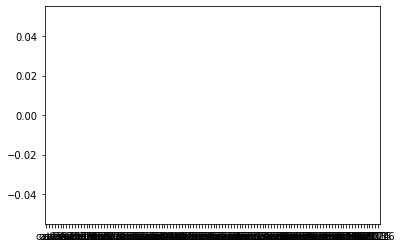

In [ ]:
# ploting number of nan per category
sns.barplot(x=list(nan_cat.keys()),y=list(nan_cat.values()))

In [ ]:
data

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,...,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,...,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,D,E,E,A,P,I,D,A,A,D,E,J,G,B,BI,EG,A,G,BM,A,L,CK,0.347403,0.785784,0.613660,0.473202,0.939556,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216,1198.62
188314,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,D,E,C,A,P,K,A,A,A,E,E,H,F,B,BI,BT,A,AV,AU,E,J,DF,0.507661,0.555782,0.549770,0.802892,0.704268,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872,1108.34
188315,A,B,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,H,D,D,D,E,C,A,P,F,C,C,A,E,F,H,F,B,BI,DM,A,W,AF,A,K,DJ,0.484469,0.785784,0.792378,0.189137,0.482436,0.345883,0.370534,0.24564,0.45808,0.47779,0.445614,0.443374,0.339244,0.503888,5762.64
188316,A,B,A,A,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,C,D,C,E,C,D,T,L,J,A,A,K,G,F,J,K,BI,AI,A,AS,AJ,A,O,MD,0.438385,0.422197,0.298977,0.383428,0.340543,0.704364,0.562866,0.34987,0.44767,0.53881,0.863052,0.852865,0.654753,0.721707,1562.87


In [ ]:
data=data.drop(188318)



1.   There are no outliers in categories 
2.   There are nan in the data



<h2> Analysis on categorical variable </h2>


*   We aim to check the variation of output unique labels per each categorical variable
*   Also number of times a unique label is repeated along all the variables



In [ ]:
num_of_unique=[]
count_of_each=[]
for i in cat_f:
  num_of_unique.append(len(data[i].unique()))
  count_of_each=count_of_each+list(data[i].value_counts())

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<h2> variation loss as per each label </h2>

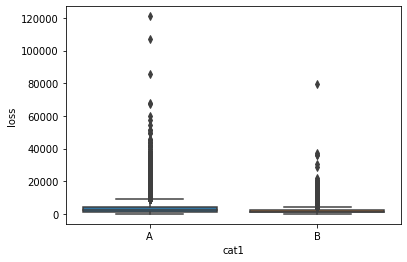

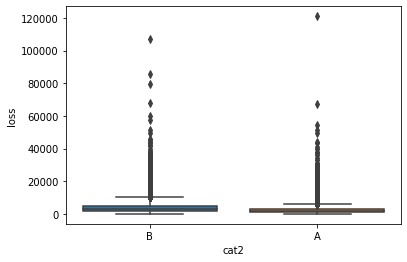

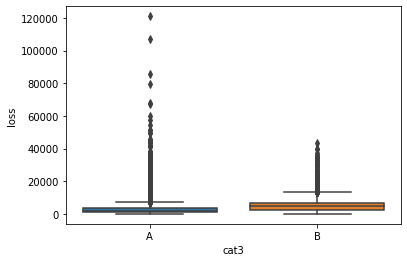

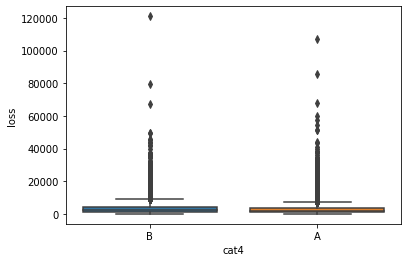

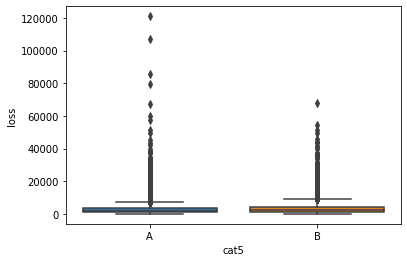

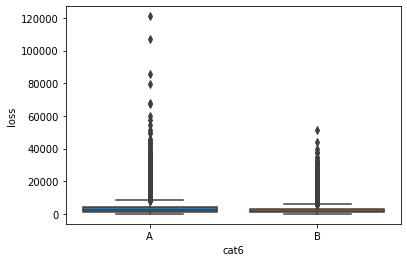

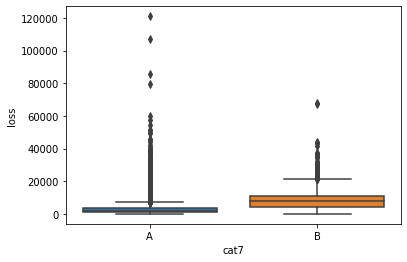

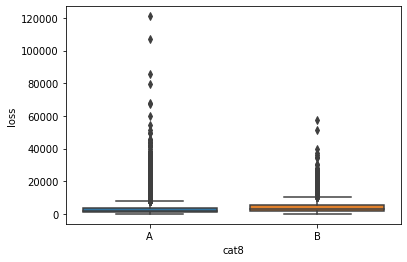

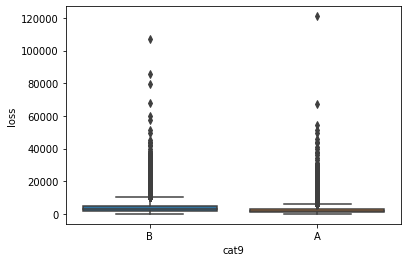

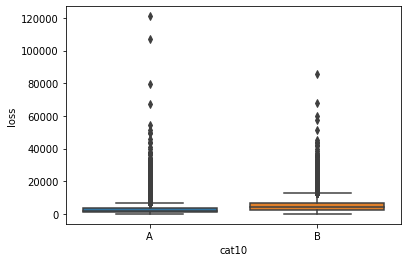

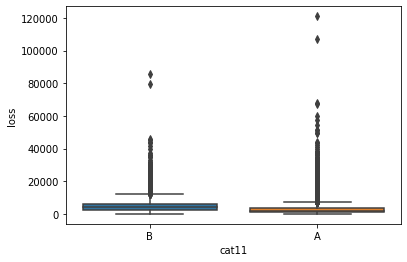

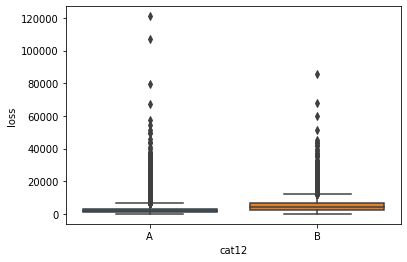

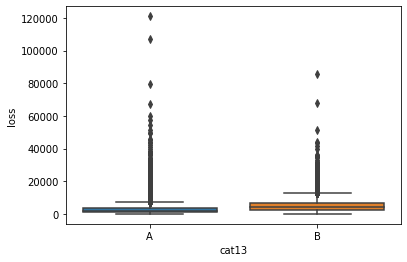

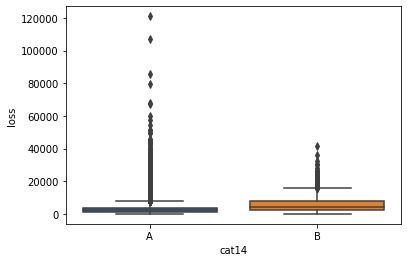

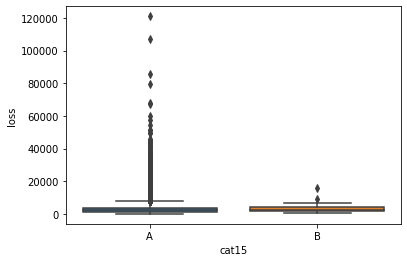

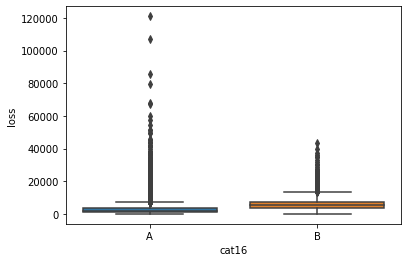

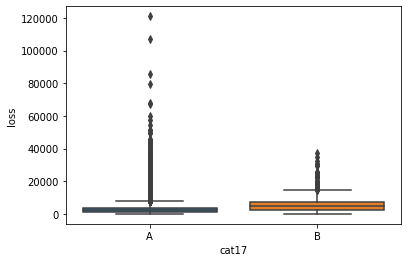

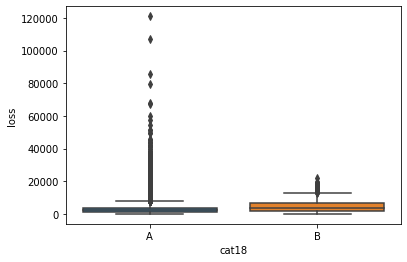

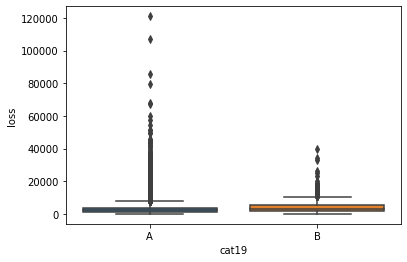

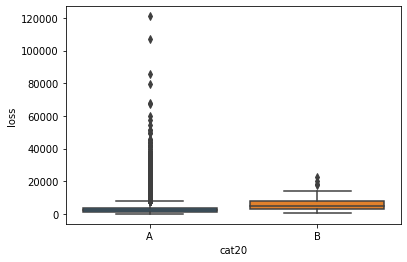

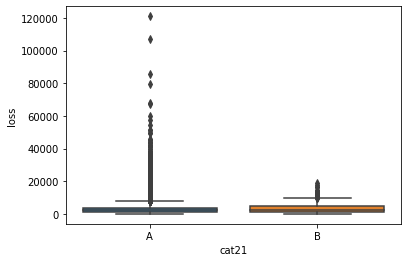

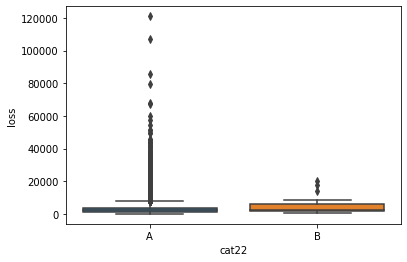

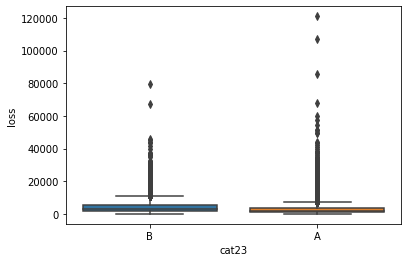

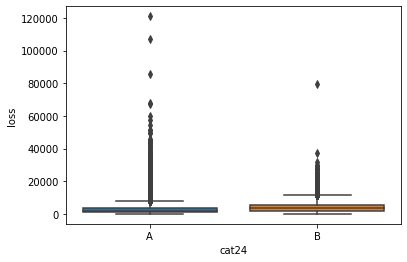

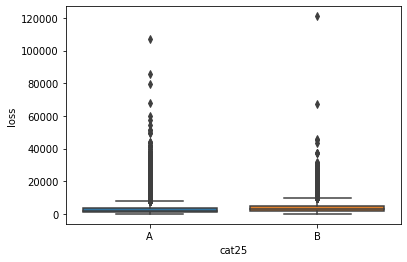

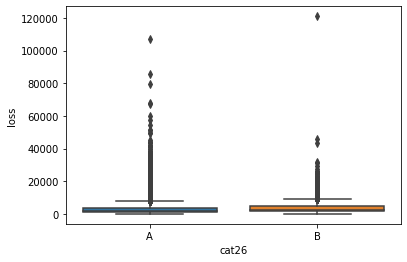

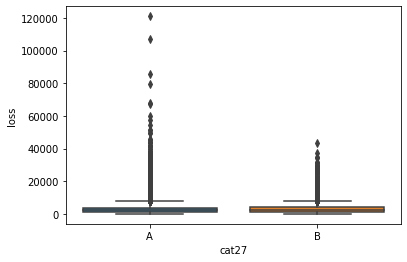

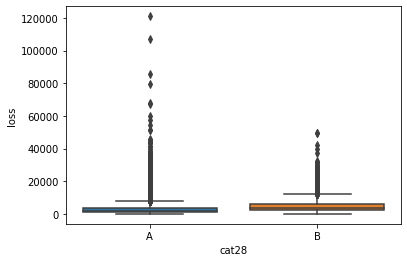

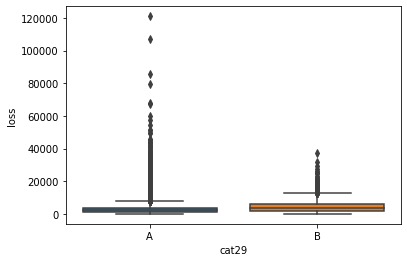

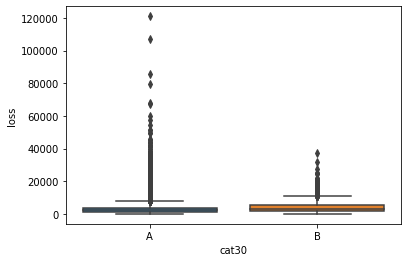

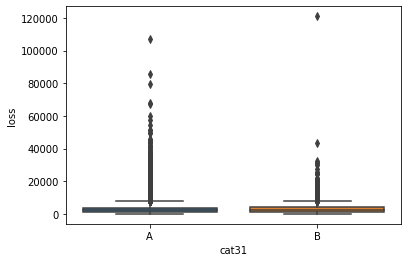

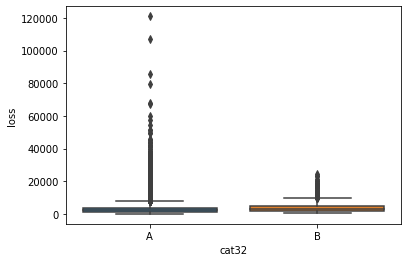

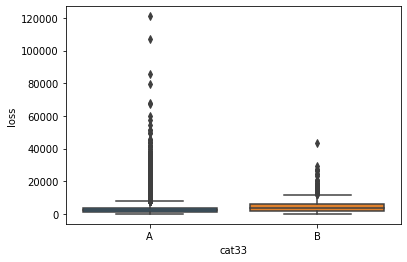

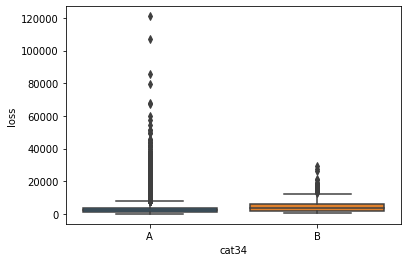

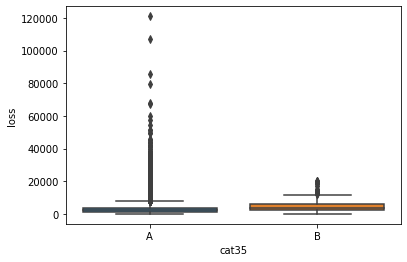

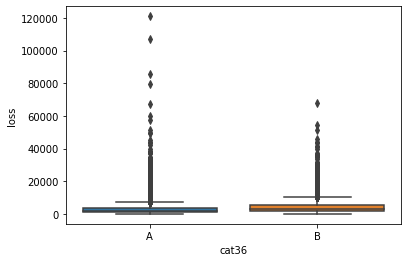

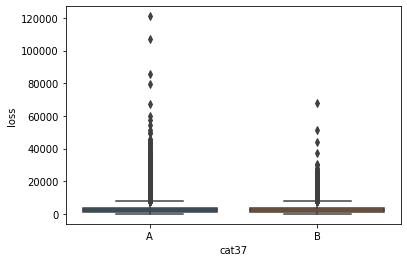

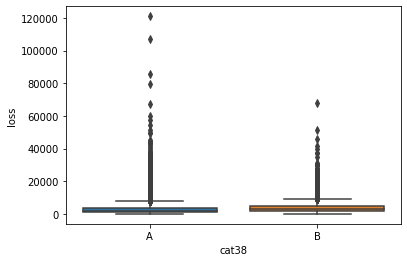

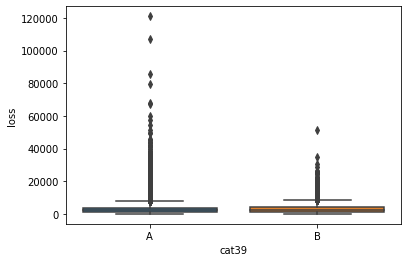

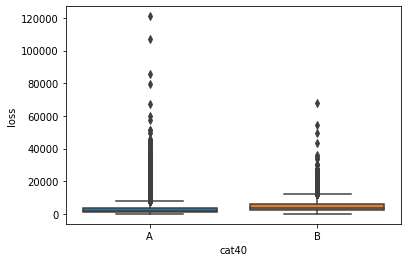

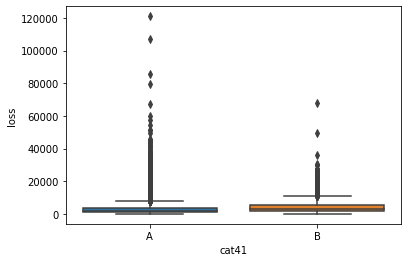

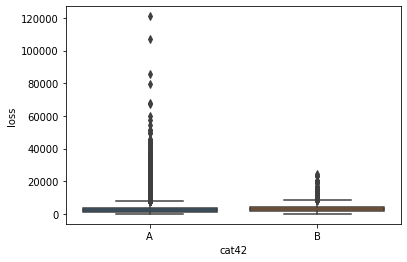

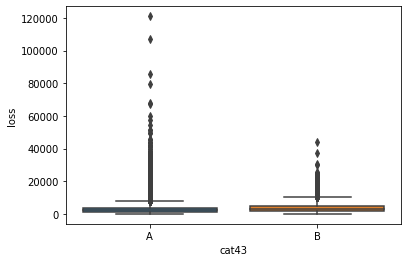

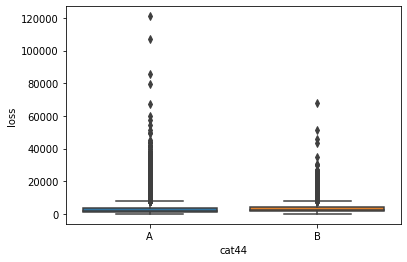

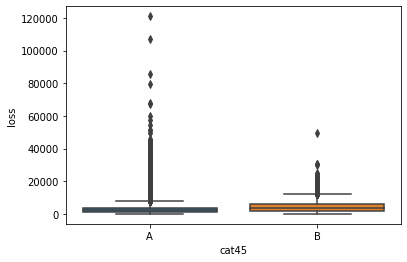

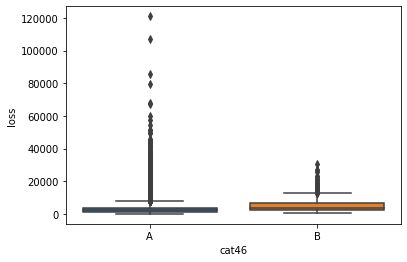

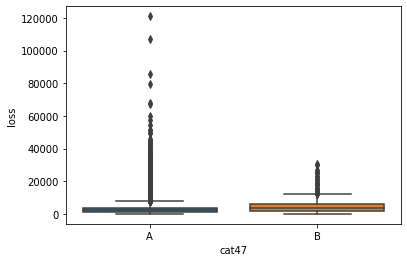

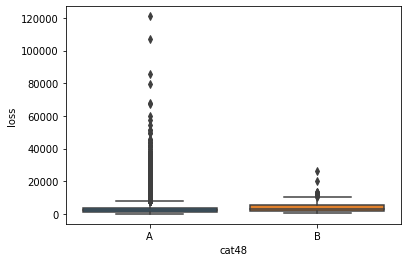

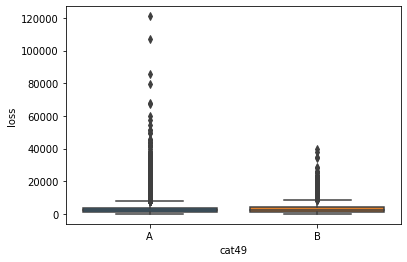

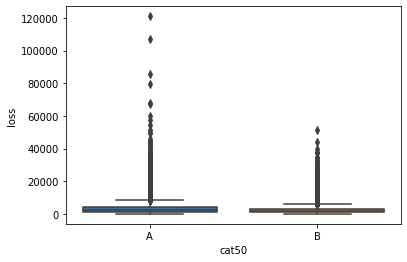

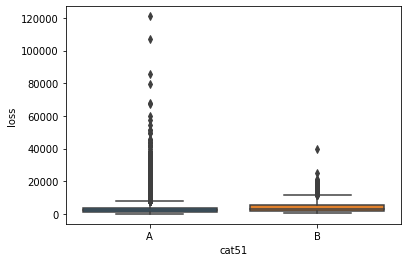

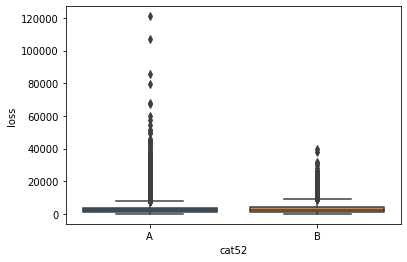

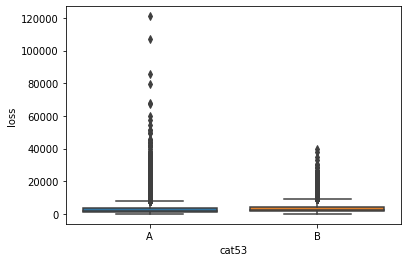

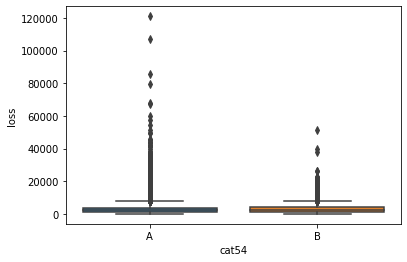

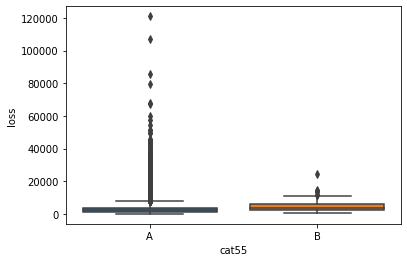

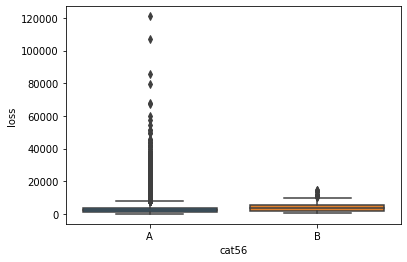

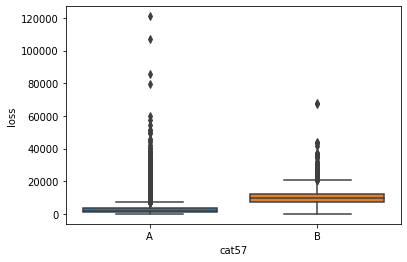

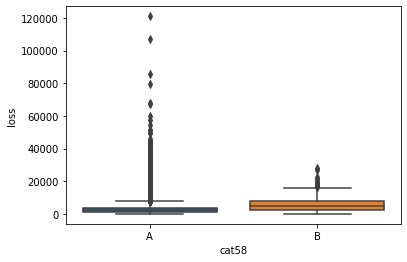

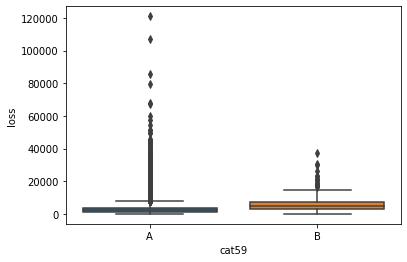

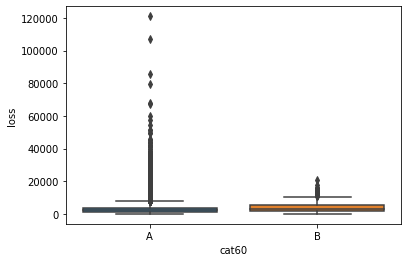

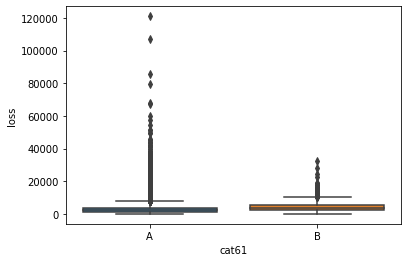

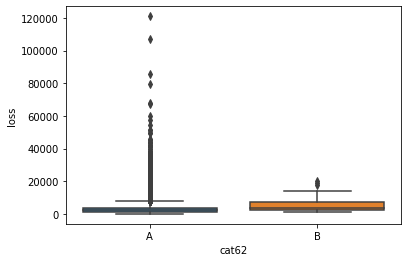

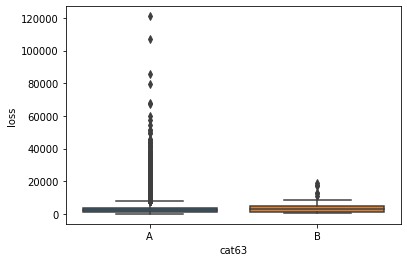

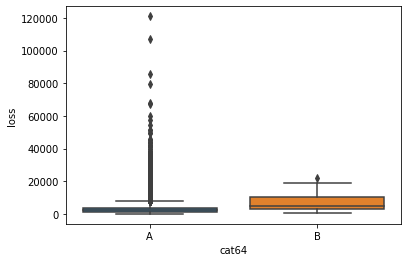

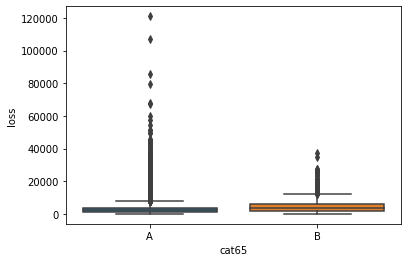

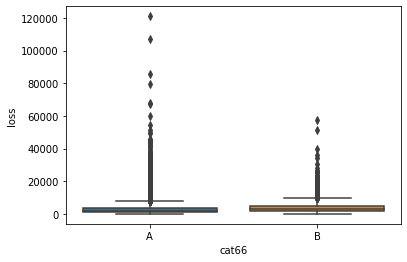

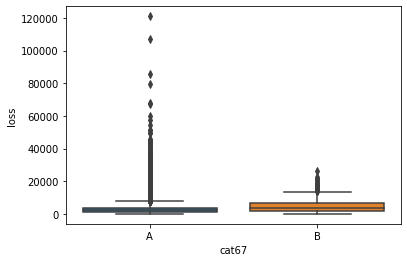

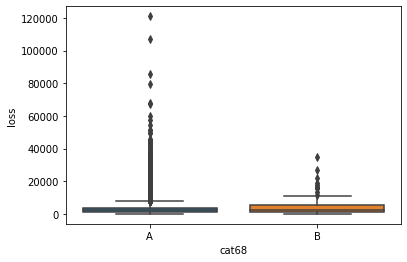

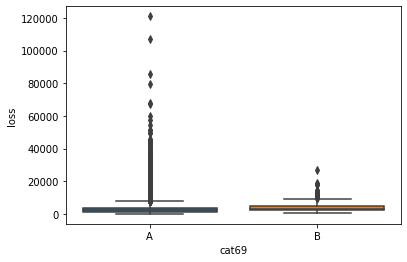

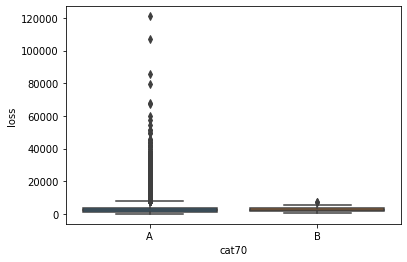

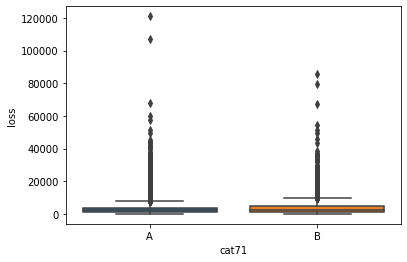

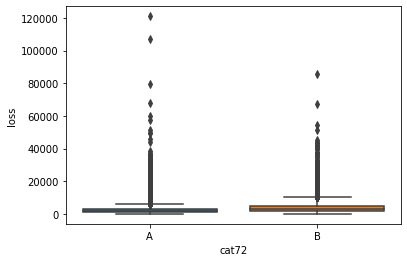

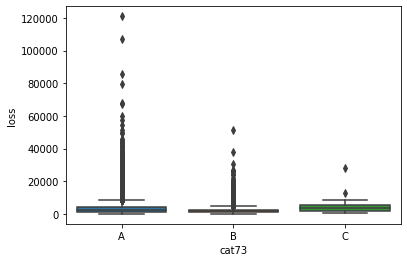

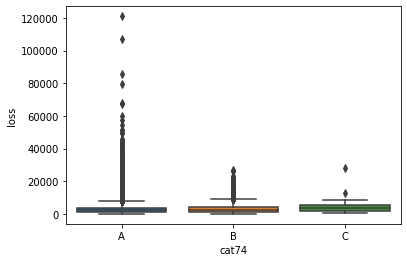

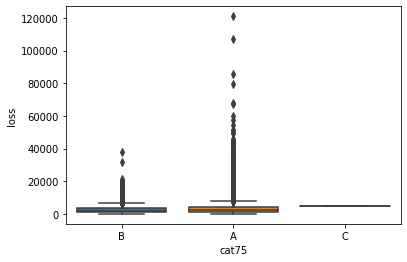

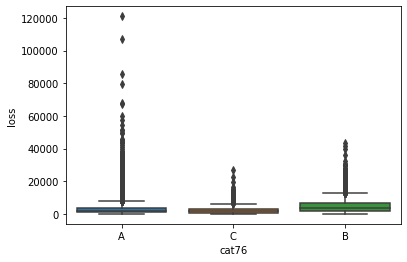

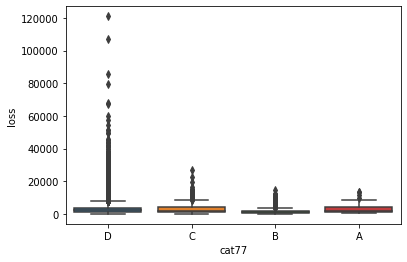

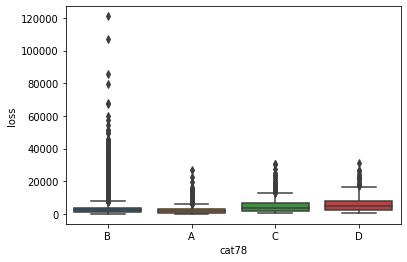

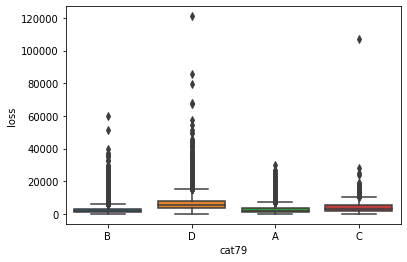

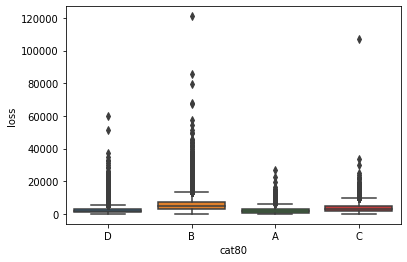

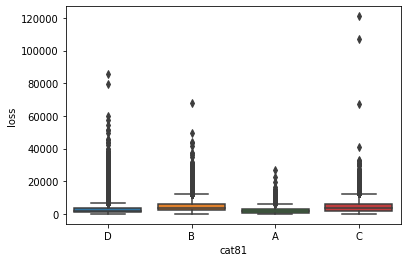

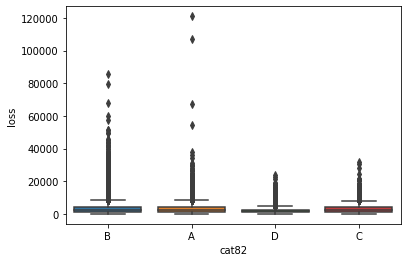

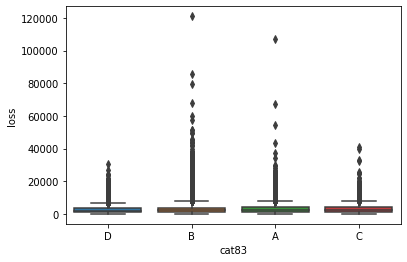

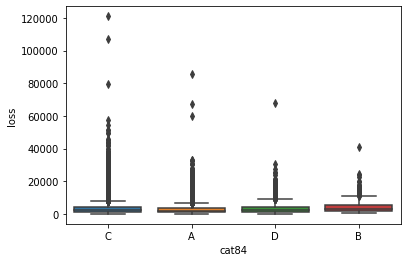

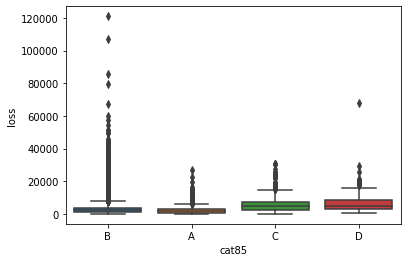

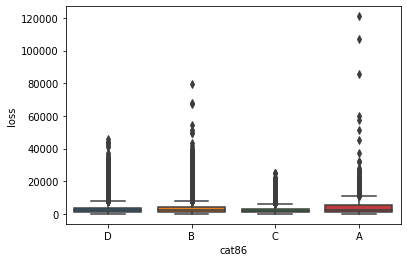

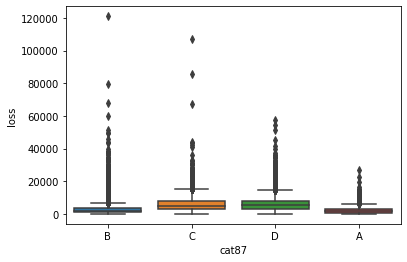

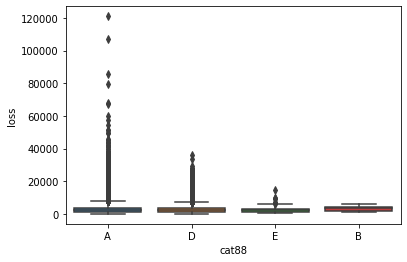

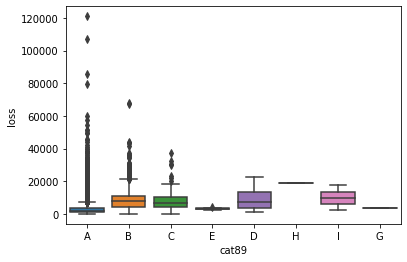

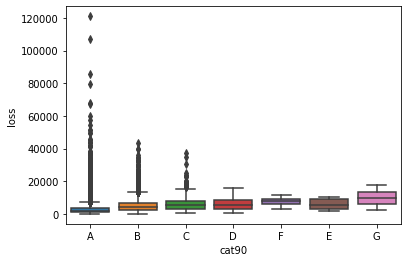

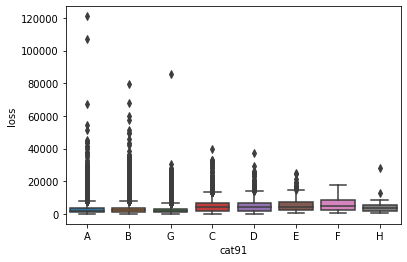

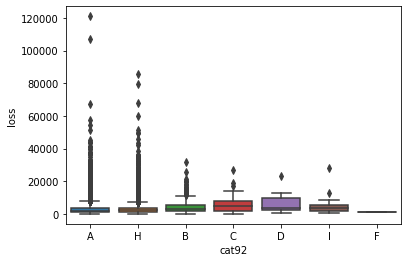

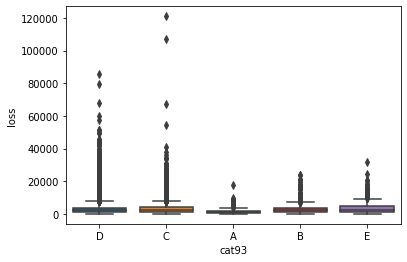

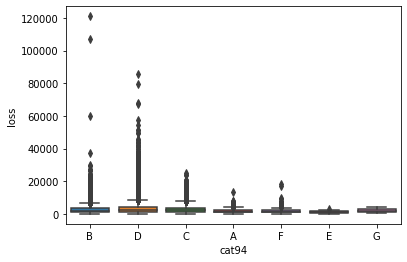

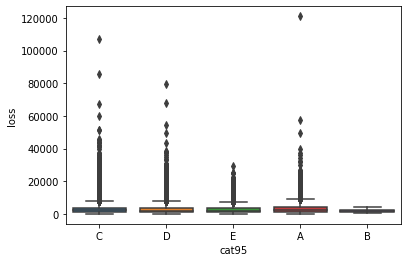

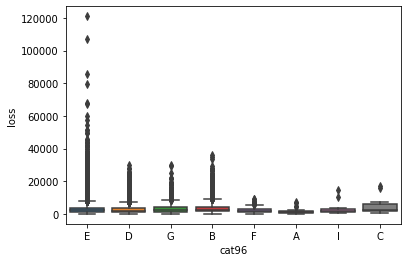

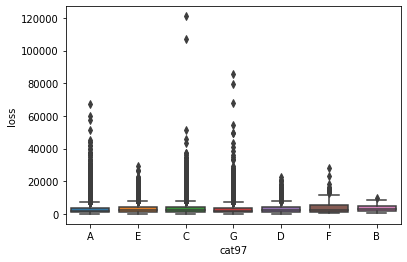

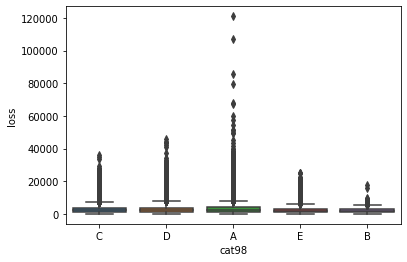

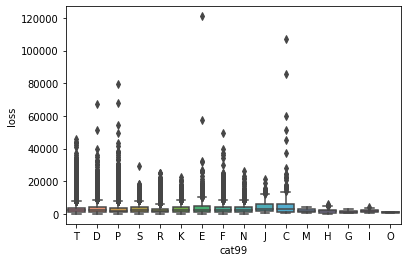

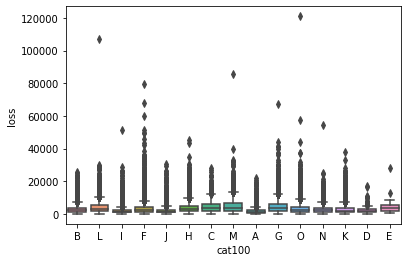

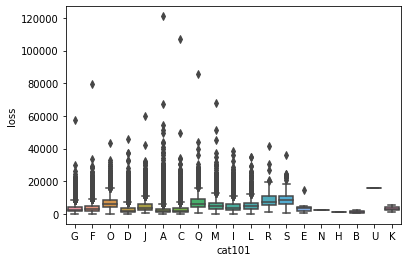

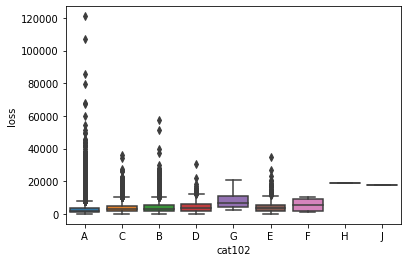

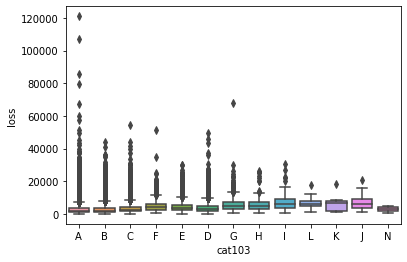

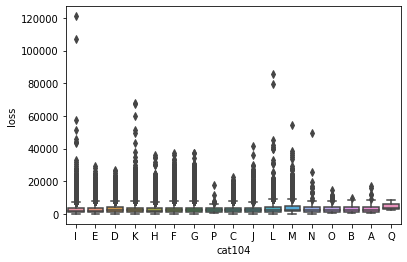

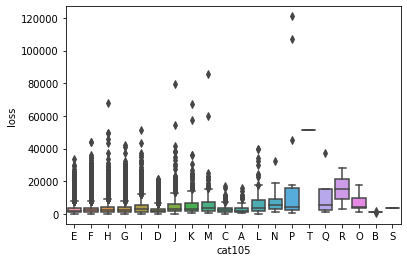

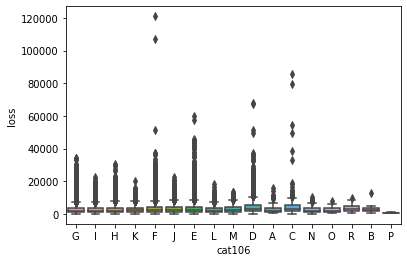

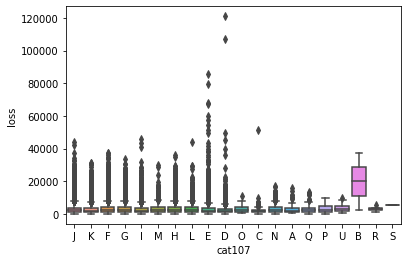

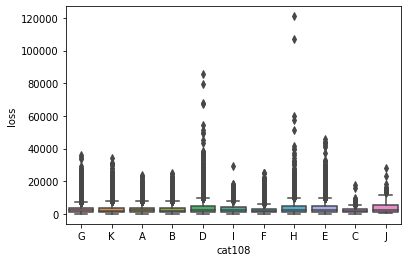

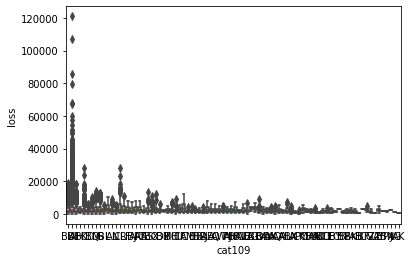

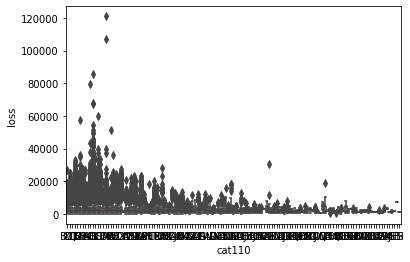

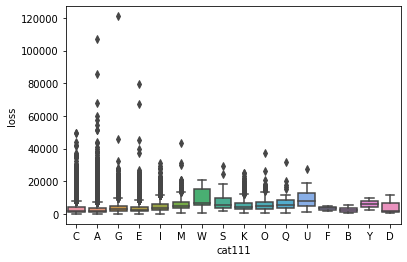

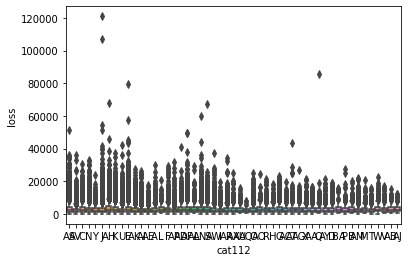

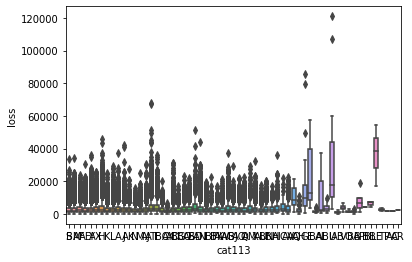

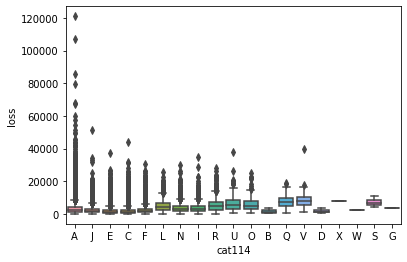

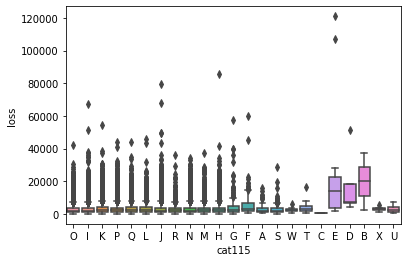

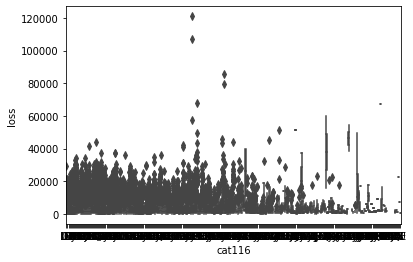

In [ ]:
for i in cat_f:
  sns.boxplot(data=data,y='loss',x=i)
  plt.show()



*   Lot of categorical variables with 2 classes have high imbalance in distribution of variables
*   The variation of the data per label of categories exists in most cases
*  There are quiet a few variables with no variation per categories hence most variables must correlated to output few not



<h2>Target Variable </h2>
*   we try  to understand ground truth avilable to us 

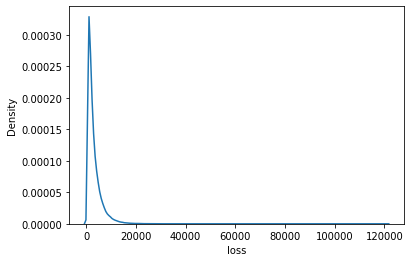

In [ ]:
import numpy as np

sns.kdeplot(data['loss'])

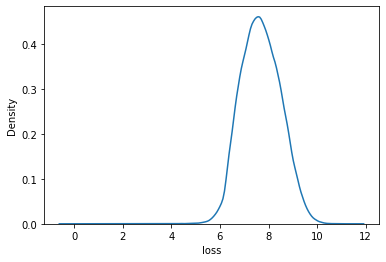

In [ ]:
sns.kdeplot(np.log(data['loss']))



*   we see that the distrubution of loss(target) is highly scued looks like combination of gaussian and power distributions
*   We apply log fuction we get much more of a gaussian curve
*  by using sqrt we get more gaussian but there is lot of skewness in the curve


<h2> Distribution of all the Continous variables </h2>


*   We try to plot distribution of all the continous variables wrt output





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


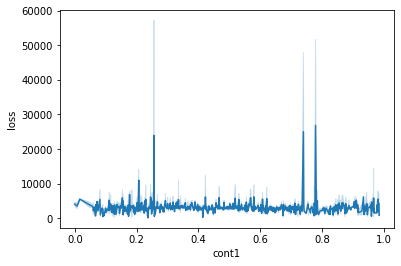

In [ ]:
sns.lineplot(data['cont1'],data['loss'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


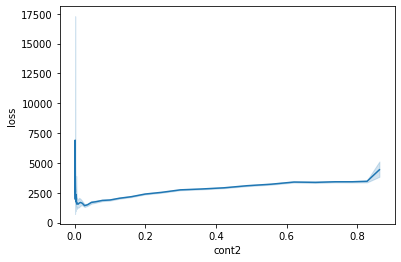

In [ ]:
sns.lineplot(data['cont2'],data['loss'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


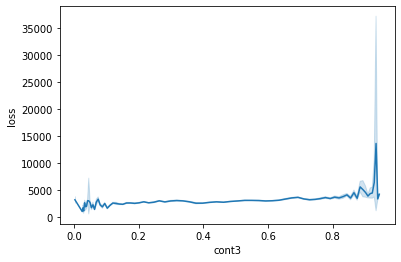

In [ ]:
sns.lineplot(data['cont3'],data['loss'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


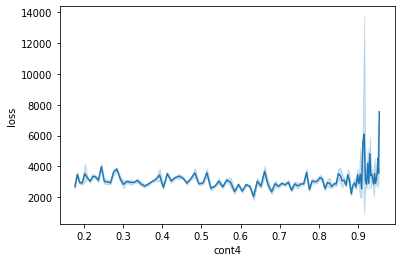

In [ ]:
sns.lineplot(data['cont4'],data['loss'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


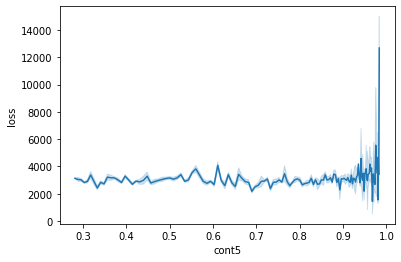

In [ ]:
sns.lineplot(data['cont5'],data['loss'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


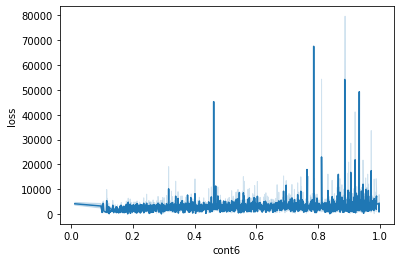

In [ ]:
sns.lineplot(data['cont6'],data['loss'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


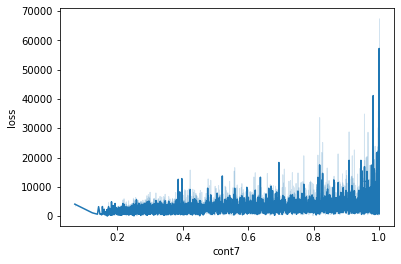

In [ ]:
sns.lineplot(data['cont7'],data['loss'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


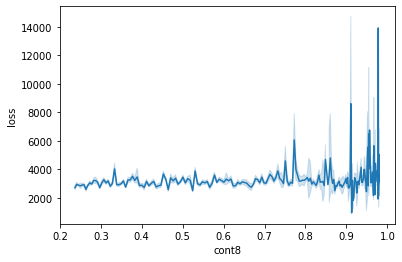

In [ ]:
sns.lineplot(data['cont8'],data['loss'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


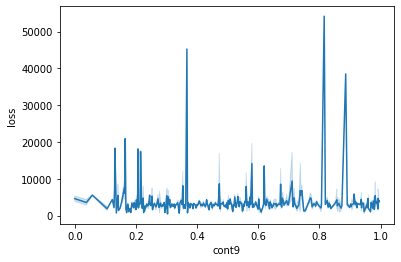

In [ ]:
sns.lineplot(data['cont9'],data['loss'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


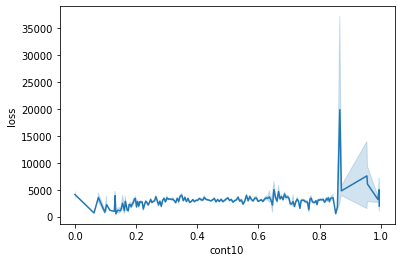

In [ ]:
sns.lineplot(data['cont10'],data['loss'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


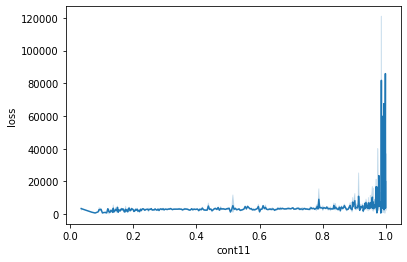

In [ ]:
sns.lineplot(data['cont11'],data['loss'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


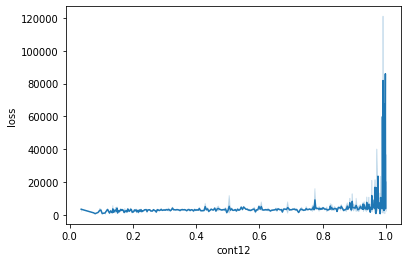

In [ ]:
sns.lineplot(data['cont12'],data['loss'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


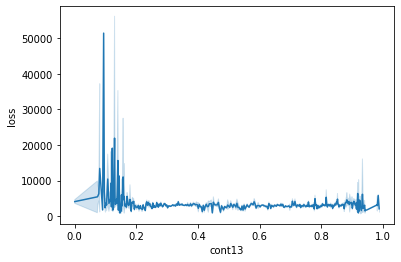

In [ ]:
sns.lineplot(data['cont13'],data['loss'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


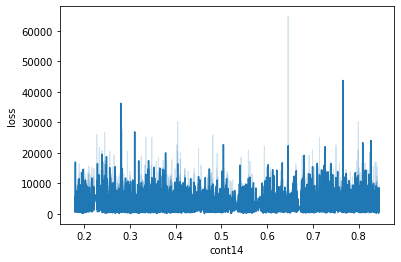

In [ ]:
sns.lineplot(data['cont14'],data['loss'])



*   There seems to be no significant patterns common to all the data
*   application of various transforms like log,sine does not seem to affect the pattern much



<h2> correlation with ground truth by all variables </h2>

In [ ]:
c=['cont'+str(i+1) for i in range(14)]

In [ ]:
y=data['loss']

In [ ]:
X=data.drop(['loss'],axis=1)

In [ ]:
mu_con={}
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import spearmanr
for i in c:
   b=data[i]
   out=data['loss']
   y,z=spearmanr(b,out)
   mu_con[i]=y

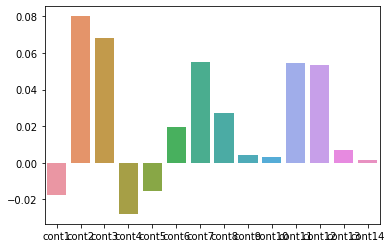

In [ ]:
sns.barplot(x=list(mu_con.keys()),y=list(mu_con.values()))

In [ ]:
mu_con={}
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import spearmanr
for k in c:
  x={}
  for i in c:
    b=data[i]/data[k]
    out=data['loss']
    y,z=spearmanr(b,out)
    if i!=k:
      if abs(y)>0.05:
        x[i]=y
  mu_con[k]=x



/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


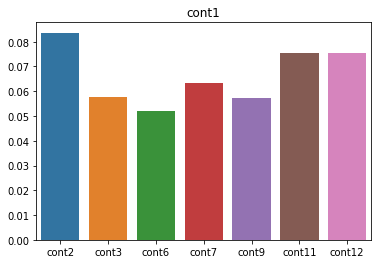

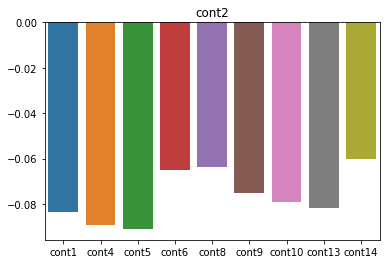

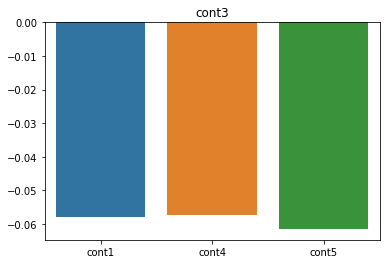

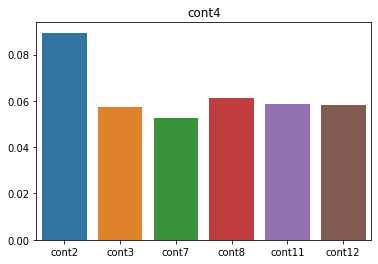

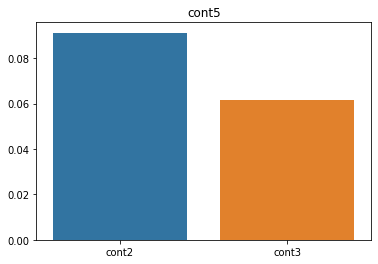

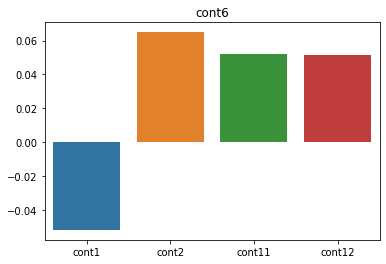

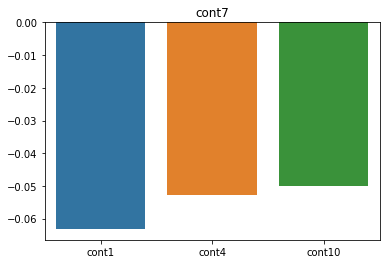

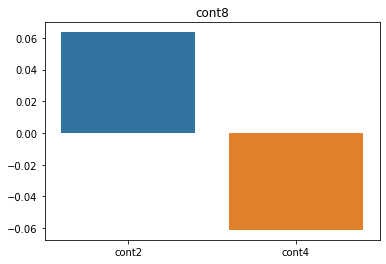

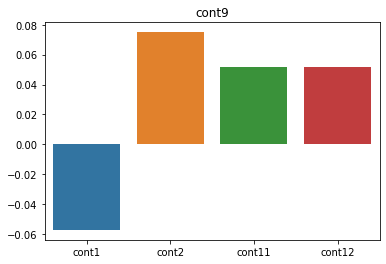

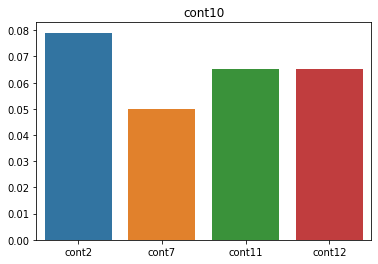

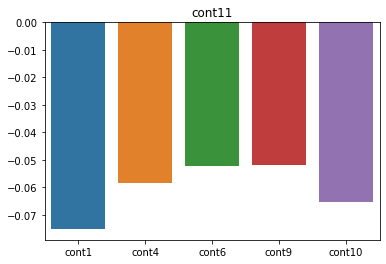

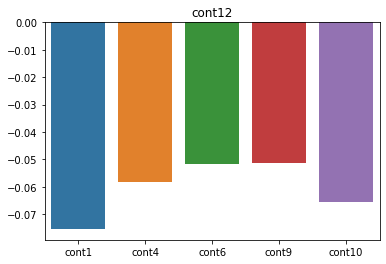

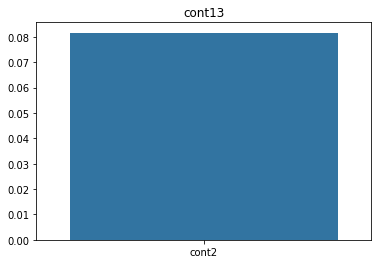

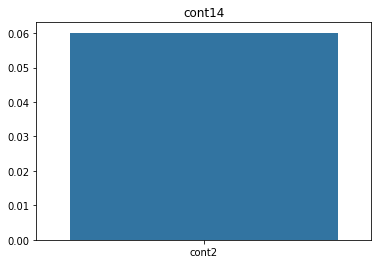

In [ ]:
for i in c:
  l= mu_con[i]
  x=list(l.keys())
  y=list(l.values())
  sns.barplot(x=x,y=y)
  plt.title(i)
  plt.show()

In [ ]:
mu_con={}
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import spearmanr
for k in c:
  x={}
  for i in c:
    b=data[i]*data[k]
    out=data['loss']
    y,z=spearmanr(b,out)
    if i!=k:
      if abs(y)>0.05:
        x[i]=y
  mu_con[k]=x
  


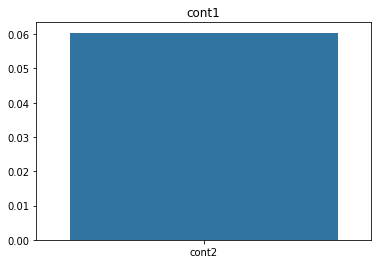

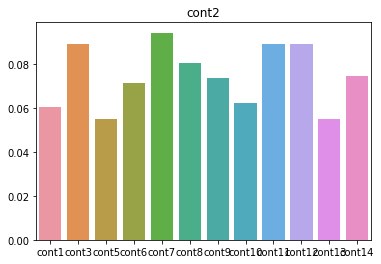

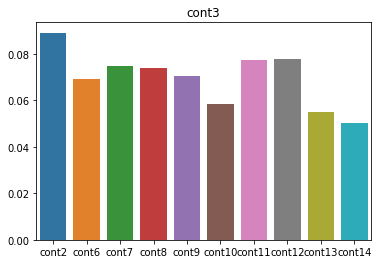

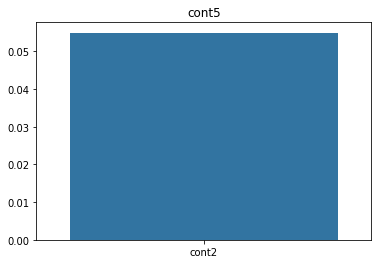

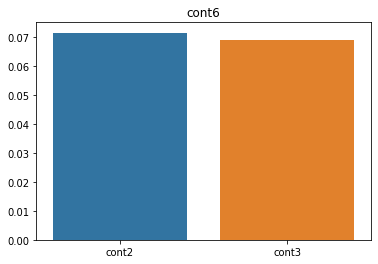

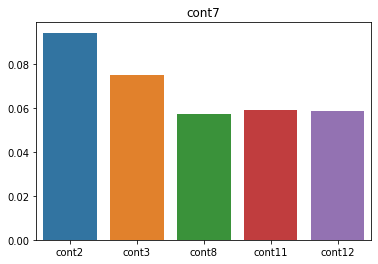

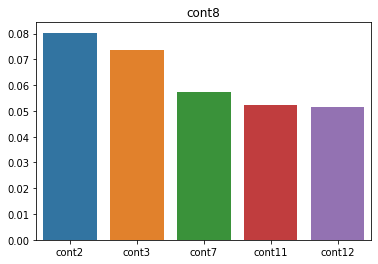

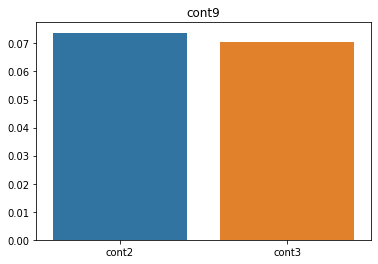

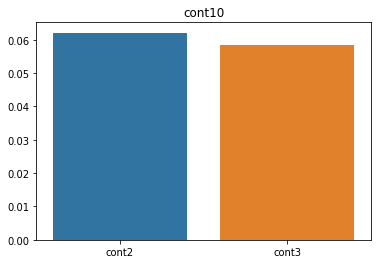

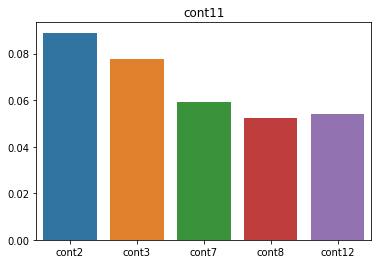

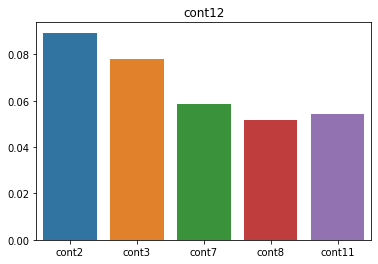

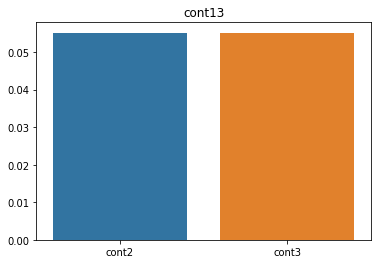

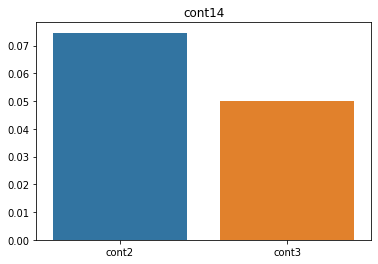

In [ ]:
for i in c:
  l= mu_con[i]
  if l:
    x=list(l.keys())
    y=list(l.values())
    sns.barplot(x=x,y=y)
    plt.title(i)
    plt.show()



*   we have used spearman corellation to measure the dependence between variables and ground truth
*   Most continous variables are related to ground truth altleast to some extent
*   We try mutiplying and dividing features and several features have good correlation


In [ ]:
ar=[]
for i in range(116):
  ar.append(True)

In [ ]:

unit_label={}
for i in cat_f:
  unit_label[i]=[]
  x=data[i].value_counts()
  y=x.index
  for j in y:
    if x[j]<30:
      unit_label[i].append(j)

In [ ]:
unit_label

{'cat1': [],
 'cat10': [],
 'cat100': ['E'],
 'cat101': ['E', 'B', 'K', 'N', 'U', 'H'],
 'cat102': ['G', 'F', 'H', 'J'],
 'cat103': ['L', 'K', 'N'],
 'cat104': ['Q'],
 'cat105': ['P', 'O', 'B', 'Q', 'R', 'T', 'S'],
 'cat106': ['B', 'P'],
 'cat107': ['R', 'B', 'S'],
 'cat108': [],
 'cat109': ['S',
  'Y',
  'BJ',
  'AU',
  'AI',
  'AN',
  'E',
  'BR',
  'BK',
  'AA',
  'BB',
  'BC',
  'CK',
  'CF',
  'V',
  'BS',
  'AY',
  'CE',
  'CG',
  'P',
  'AF',
  'CJ',
  'AP',
  'CH',
  'AV',
  'BE',
  'BY',
  'BG',
  'BM',
  'BV',
  'BT',
  'AO',
  'BN',
  'AK',
  'J',
  'CB',
  'BP',
  'ZZ',
  'AG',
  'BF',
  'B'],
 'cat11': [],
 'cat110': ['DC',
  'AO',
  'CP',
  'DR',
  'BJ',
  'CK',
  'J',
  'DA',
  'AX',
  'BW',
  'AA',
  'R',
  'K',
  'DF',
  'BF',
  'BQ',
  'BL',
  'DS',
  'DQ',
  'AE',
  'DG',
  'P',
  'BE',
  'DE',
  'AJ',
  'DY',
  'DP',
  'DO',
  'B',
  'L',
  'Y',
  'CC',
  'CY',
  'AV',
  'CD',
  'CW',
  'ED',
  'BY',
  'H',
  'AG',
  'CX',
  'BB',
  'DB',
  'AH',
  'EK',
  'BU',
  '

In [ ]:
for i in cat_f:
  if unit_label[i]:
    if len(unit_label[i])==1:
      data=data[data[i]!=unit_label[i][0]]
    else:
      val='Rare'
      replaced=unit_label[i][1:]
      for j in replaced:
        data[i]=data[i].replace(to_replace=j,value=val)

In [ ]:
data

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,...,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,...,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,D,E,E,A,P,I,D,A,A,D,E,J,G,B,BI,EG,A,G,BM,A,L,CK,0.347403,0.785784,0.613660,0.473202,0.939556,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216,1198.62
188314,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,D,E,C,A,P,K,A,A,A,E,E,H,F,B,BI,BT,A,AV,AU,E,J,DF,0.507661,0.555782,0.549770,0.802892,0.704268,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872,1108.34
188315,A,B,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,H,D,D,D,E,C,A,P,F,C,C,A,E,F,H,F,B,BI,DM,A,W,AF,A,K,DJ,0.484469,0.785784,0.792378,0.189137,0.482436,0.345883,0.370534,0.24564,0.45808,0.47779,0.445614,0.443374,0.339244,0.503888,5762.64
188316,A,B,A,A,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,C,D,C,E,C,D,T,L,J,A,A,K,G,F,J,K,BI,AI,A,AS,AJ,A,O,MD,0.438385,0.422197,0.298977,0.383428,0.340543,0.704364,0.562866,0.34987,0.44767,0.53881,0.863052,0.852865,0.654753,0.721707,1562.87


In [ ]:

unit_label={}
for i in cat_f:
  unit_label[i]=[]
  x=data[i].value_counts()
  y=x.index
  for j in y:
    if x[j]<30:
      unit_label[i].append(j)

In [ ]:
unit_label

{'cat1': [],
 'cat10': [],
 'cat100': [],
 'cat101': ['Rare', 'E'],
 'cat102': ['G', 'Rare'],
 'cat103': ['L', 'Rare'],
 'cat104': [],
 'cat105': ['Rare', 'P'],
 'cat106': ['B', 'Rare'],
 'cat107': ['R', 'Rare'],
 'cat108': [],
 'cat109': ['S'],
 'cat11': [],
 'cat110': ['DC'],
 'cat111': ['W'],
 'cat112': [],
 'cat113': ['G'],
 'cat114': ['Rare', 'B'],
 'cat115': ['Rare', 'U'],
 'cat116': ['LH'],
 'cat12': [],
 'cat13': [],
 'cat14': [],
 'cat15': [],
 'cat16': [],
 'cat17': [],
 'cat18': [],
 'cat19': [],
 'cat2': [],
 'cat20': [],
 'cat21': [],
 'cat22': [],
 'cat23': [],
 'cat24': [],
 'cat25': [],
 'cat26': [],
 'cat27': [],
 'cat28': [],
 'cat29': [],
 'cat3': [],
 'cat30': [],
 'cat31': [],
 'cat32': [],
 'cat33': [],
 'cat34': [],
 'cat35': [],
 'cat36': [],
 'cat37': [],
 'cat38': [],
 'cat39': [],
 'cat4': [],
 'cat40': [],
 'cat41': [],
 'cat42': [],
 'cat43': [],
 'cat44': [],
 'cat45': [],
 'cat46': [],
 'cat47': [],
 'cat48': [],
 'cat49': [],
 'cat5': [],
 'cat50': [],
 

In [ ]:
for i in cat_f:
  if unit_label[i]:
    if len(unit_label[i])==1:
      data=data[data[i]!=unit_label[i][0]]
    else:
      val='Rare'
      replaced=unit_label[i][1:]
      for j in replaced:
        data[i]=data[i].replace(to_replace=j,value=val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
data

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,...,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,...,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,A,B,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,D,E,E,A,P,I,D,A,A,D,E,J,G,B,BI,EG,A,G,BM,A,L,CK,0.347403,0.785784,0.613660,0.473202,0.939556,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216,1198.62
188314,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,D,E,C,A,P,K,A,A,A,E,E,H,F,B,BI,BT,A,AV,AU,E,J,DF,0.507661,0.555782,0.549770,0.802892,0.704268,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872,1108.34
188315,A,B,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,H,D,D,D,E,C,A,P,F,C,C,A,E,F,H,F,B,BI,DM,A,W,AF,A,K,DJ,0.484469,0.785784,0.792378,0.189137,0.482436,0.345883,0.370534,0.24564,0.45808,0.47779,0.445614,0.443374,0.339244,0.503888,5762.64
188316,A,B,A,A,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,C,D,C,E,C,D,T,L,J,A,A,K,G,F,J,K,BI,AI,A,AS,AJ,A,O,MD,0.438385,0.422197,0.298977,0.383428,0.340543,0.704364,0.562866,0.34987,0.44767,0.53881,0.863052,0.852865,0.654753,0.721707,1562.87


In [ ]:
from sklearn.preprocessing import LabelEncoder

for i in cat_f:
  encoder = LabelEncoder()
  data[i]=encoder.fit_transform(data[i])


In [ ]:
binary=[]

for i in cat_f:
  x=len(data[i].unique())
  if  not x>2:
    binary.append(i) 

In [ ]:
from sklearn.feature_selection import mutual_info_regression
cat_info={}

x=mutual_info_regression(data[cat_f][:20000],data['loss'][:20000])
  

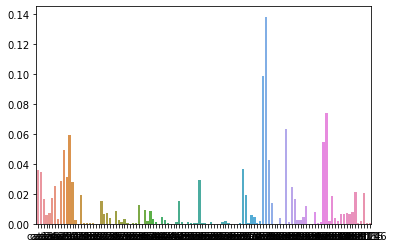

In [ ]:
sns.barplot(x=cat_f,y=x)

In [ ]:
import numpy as np
sum_of_binary=[]
d=data[binary]
for i in d.values:
  sum_of_binary.append(np.sum(i))

In [ ]:
data[binary]

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75
0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
188314,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
188315,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
188316,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
sum_of_binary=np.array(sum_of_binary)

In [ ]:
spearmanr(sum_of_binary,data['loss'])

SpearmanrResult(correlation=0.4414315305428974, pvalue=0.0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


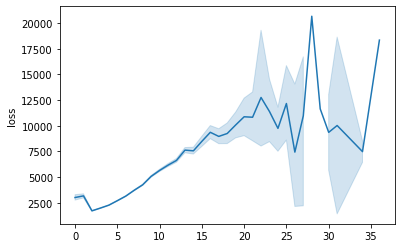

In [ ]:
sns.lineplot(sum_of_binary,data['loss'])

In [ ]:
binary

['cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9',
 'cat10',
 'cat11',
 'cat12',
 'cat13',
 'cat14',
 'cat15',
 'cat16',
 'cat17',
 'cat18',
 'cat19',
 'cat20',
 'cat21',
 'cat22',
 'cat23',
 'cat24',
 'cat25',
 'cat26',
 'cat27',
 'cat28',
 'cat29',
 'cat30',
 'cat31',
 'cat32',
 'cat33',
 'cat34',
 'cat35',
 'cat36',
 'cat37',
 'cat38',
 'cat39',
 'cat40',
 'cat41',
 'cat42',
 'cat43',
 'cat44',
 'cat45',
 'cat46',
 'cat47',
 'cat48',
 'cat49',
 'cat50',
 'cat51',
 'cat52',
 'cat53',
 'cat54',
 'cat55',
 'cat56',
 'cat57',
 'cat58',
 'cat59',
 'cat60',
 'cat61',
 'cat62',
 'cat63',
 'cat64',
 'cat65',
 'cat66',
 'cat67',
 'cat68',
 'cat69',
 'cat70',
 'cat71',
 'cat72',
 'cat73',
 'cat74',
 'cat75']

In [ ]:
non_binary=[]

for i in cat_f:
  x=len(data[i].unique())
  if x>2:
    non_binary.append(i) 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
for i in non_binary:
  onehot=OneHotEncoder()
  a=onehot.fit_transform(data[i].values.reshape(-1,1)).toarray()
  data=data.drop(labels=[i],axis=1)
  l=a.shape[1]
  for j in range(l-1):
    data[i+'_'+str(j)]=a[:,j]

In [ ]:
cols=data.columns

In [ ]:
cols=set(cols)
c=set(c)
cols=cols-c
cols=list(cols)

In [ ]:
cols.remove('loss')

In [ ]:
sum_of_binary=[]
d=data[cols]
for i in d.values:
  
  sum_of_binary.append(np.sum(i))

In [ ]:
spearmanr(sum_of_binary,data['loss'])

SpearmanrResult(correlation=0.39155187541818176, pvalue=0.0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


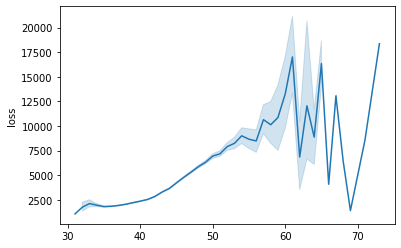

In [ ]:
sns.lineplot(sum_of_binary,data['loss'])

In [ ]:
d=data[list(c)]
mean = []
for i in d.values:
  mean.append(np.mean(i))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


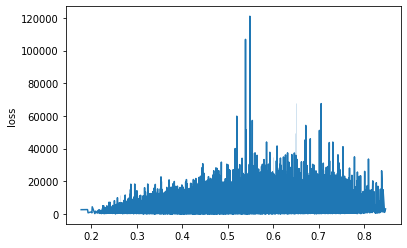

In [ ]:
sns.lineplot(np.array(mean),data['loss'])

In [ ]:
spearmanr(mean,data['loss'])

SpearmanrResult(correlation=0.048194233079962956, pvalue=3.939259282500311e-97)

In [ ]:
d=data[list(c)]
mean = []
for i in d.values:
  mean.append(np.max(i))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


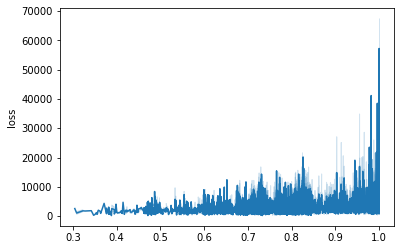

In [ ]:
sns.lineplot(np.array(mean),data['loss'])

In [ ]:
spearmanr(mean,data['loss'])

SpearmanrResult(correlation=0.061492086130028115, pvalue=5.3486447190252185e-157)



*   Considering categorical variables we find that the several variables have good amount of mutual information  
*   We also observe several variables with very low mutual information, even zero for certain variables
* The reason may be high imabalance in categories in some variables



<h2> Modeling </h2>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from scipy.stats import skew, boxcox
from sklearn.preprocessing import StandardScaler
import itertools

In [16]:
data= pd.read_csv('train.csv', error_bad_lines=False)
test= pd.read_csv('test.csv',error_bad_lines=False)

b'Skipping line 188321: expected 132 fields, saw 133\nSkipping line 188322: expected 132 fields, saw 133\nSkipping line 188323: expected 132 fields, saw 133\nSkipping line 188324: expected 132 fields, saw 133\nSkipping line 188325: expected 132 fields, saw 133\nSkipping line 188326: expected 132 fields, saw 133\nSkipping line 188327: expected 132 fields, saw 133\nSkipping line 188328: expected 132 fields, saw 133\nSkipping line 188329: expected 132 fields, saw 133\nSkipping line 188330: expected 132 fields, saw 133\nSkipping line 188331: expected 132 fields, saw 133\nSkipping line 188332: expected 132 fields, saw 133\nSkipping line 188333: expected 132 fields, saw 133\nSkipping line 188334: expected 132 fields, saw 133\nSkipping line 188335: expected 132 fields, saw 133\nSkipping line 188336: expected 132 fields, saw 133\nSkipping line 188337: expected 132 fields, saw 133\nSkipping line 188338: expected 132 fields, saw 133\nSkipping line 188339: expected 132 fields, saw 133\nSkipping l

In [17]:
data['loss']=np.log(data['loss']+200)

In [18]:
data=data.drop(188318)

In [23]:
test=test.drop(125546)

In [24]:
test

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,...,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,A,D,C,C,E,C,D,T,H,G,A,A,G,E,I,L,K,BI,BC,A,J,AX,A,Q,HG,0.321594,0.299102,0.246911,0.402922,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,A,D,D,D,E,A,A,P,B,D,A,A,G,G,G,F,B,BI,CO,E,G,X,A,L,HK,0.634734,0.620805,0.654310,0.946616,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,B,A,B,B,B,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,B,...,A,A,D,D,C,E,E,A,D,G,Q,A,D,D,E,J,G,A,BI,CS,C,U,AE,A,K,CK,0.290813,0.737068,0.711159,0.412789,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,A,...,G,H,D,D,C,E,E,D,T,G,A,A,D,E,E,I,K,K,BI,CR,A,AY,AJ,A,P,DJ,0.268622,0.681761,0.592681,0.354893,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,A,D,B,D,E,A,A,P,A,A,A,A,F,E,G,E,B,AB,EG,A,E,I,C,J,HA,0.553846,0.299102,0.263570,0.696873,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125541,587617,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,A,D,D,D,E,A,A,P,L,A,A,A,F,F,G,F,D,BI,CL,C,AI,H,A,K,GS,0.458463,0.245921,0.654310,0.284048,0.281143,0.438917,0.815941,0.39455,0.48740,0.40666,0.550529,0.538473,0.298734,0.345946
125542,587621,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,B,A,B,...,B,H,D,D,C,E,E,D,T,F,A,B,D,E,F,I,J,K,BI,DM,A,AV,BJ,J,O,DP,0.304143,0.488789,0.549770,0.267727,0.674529,0.346948,0.424968,0.47669,0.25753,0.26894,0.324486,0.352251,0.490001,0.290576
125543,587627,B,B,A,A,B,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,...,B,H,D,D,C,E,A,C,T,F,F,A,B,K,H,F,H,G,BI,BP,A,E,BM,A,P,LY,0.899689,0.555782,0.484196,0.594598,0.794794,0.808958,0.511502,0.72299,0.94438,0.83510,0.933174,0.926619,0.848129,0.808125
125544,587629,A,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,A,D,B,C,E,E,D,T,J,A,B,A,E,E,J,K,K,K,EB,A,K,AE,E,O,DJ,0.329232,0.358319,0.484196,0.373816,0.302678,0.372125,0.388545,0.31796,0.32128,0.36974,0.307628,0.301921,0.608259,0.361542


In [27]:
test['loss']=0

In [29]:
data_test= pd.concat((data,test)).reset_index(drop=True)

In [31]:
cont=['cont'+str(i+1) for i in range(14)]

In [33]:
sf=data_test[cont].apply(lambda x: skew(x.dropna()))


In [34]:
sf=sf[sf>0.25]

In [35]:
sf=sf.index

In [36]:
for i in sf:
  data_test[i]=data_test[i]+1
  data_test[i],z=boxcox(data_test[i])
  

In [37]:
data_test

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,...,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1.0,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.467364,0.245921,0.187583,0.441786,0.184910,0.422998,0.211547,0.198573,0.285562,0.506805,0.409234,0.418970,0.401756,0.427380,7.788701
1,2.0,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.262984,0.737068,0.592681,0.380876,0.283136,0.307530,0.246429,0.288637,0.209797,0.326263,0.273603,0.290274,0.345041,0.236443,7.302227
2,5.0,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,...,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.217442,0.358319,0.484196,0.191637,0.210858,0.225902,0.203807,0.185744,0.174724,0.258103,0.301306,0.294755,0.157579,0.448093,8.072495
3,10.0,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.257281,0.555782,0.527991,0.272297,0.217224,0.308525,0.231842,0.204906,0.199117,0.329298,0.266725,0.261304,0.343048,0.384416,7.038652
4,11.0,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.225246,0.159990,0.527991,0.321486,0.265579,0.151818,0.173579,0.172804,0.156229,0.181578,0.178838,0.176410,0.188503,0.307189,7.994244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313859,587617.0,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,D,E,A,A,P,L,A,A,A,F,F,G,F,D,BI,CL,C,AI,H,A,K,GS,0.338624,0.245921,0.654310,0.221340,0.174663,0.307530,0.325768,0.233157,0.249131,0.307850,0.399094,0.389934,0.217807,0.260731,0.000000
313860,587621.0,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,B,A,B,...,H,D,D,C,E,E,D,T,F,A,B,D,E,F,I,J,K,BI,DM,A,AV,BJ,J,O,DP,0.245946,0.488789,0.549770,0.211302,0.261943,0.259325,0.242846,0.258301,0.173302,0.221587,0.264440,0.281324,0.303334,0.227954,0.000000
313861,587627.0,B,B,A,A,B,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,...,H,D,D,C,E,A,C,T,F,F,A,B,K,H,F,H,G,BI,BP,A,E,BM,A,P,LY,0.534991,0.555782,0.484196,0.373268,0.275221,0.452938,0.267413,0.311798,0.319184,0.506805,0.572654,0.564242,0.407580,0.459234,0.000000
313862,587629.0,A,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,B,C,E,E,D,T,J,A,B,A,E,E,J,K,K,K,EB,A,K,AE,E,O,DJ,0.262168,0.358319,0.484196,0.272297,0.182380,0.273148,0.230966,0.204906,0.199117,0.286103,0.253080,0.248120,0.344049,0.269506,0.000000


In [ ]:
cat_f

In [38]:
def custom_encoder(var):
  out=0
  li=len(str(var))
  for i in range(li):
    out+=( ord(str(var)[i]) - ord('A')+1)*26**(li-i-1)
  return out

In [40]:
COMB_FEATURE = 'cat80,cat87,cat57,cat12,cat79,cat10,cat7,cat89,cat2,cat72,' \
               'cat81,cat11,cat1,cat13,cat9,cat3,cat16,cat90,cat23,cat36,' \
               'cat73,cat103,cat40,cat28,cat111,cat6,cat76,cat50,cat5,' \
               'cat4,cat14,cat38,cat24,cat82,cat25'.split(',')

for i in range(len(COMB_FEATURE)):
      for j in range(i+1,len(COMB_FEATURE)):
          feature = COMB_FEATURE[i]+'_'+COMB_FEATURE[j]
          data_test[feature]=data_test[COMB_FEATURE[i]]+data_test[COMB_FEATURE[j]]
          data_test[feature]=data_test[feature].apply(custom_encoder)

In [41]:
for i in cat_f:
  data_test[i]=data_test[i].apply(custom_encoder)
  

In [42]:
from sklearn.metrics import mean_absolute_error
def xg_eval_mae(yhat, dtrain):
    y = dtrain.get_label()
    return 'mae', mean_absolute_error(np.exp(y)-200,np.exp(yhat)-200)

['cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont11',
 'cont12',
 'cont13',
 'cont14']

In [51]:
from sklearn.preprocessing import StandardScaler

In [68]:
for i in cont:
  scaler=StandardScaler()
  data_test[i]=scaler.fit_transform(data_test[i].values.reshape(-1,1))
  

In [61]:
l=len(data)

In [63]:
data_final=data_test.iloc[:l,:].copy()

In [64]:
test_final=data_test.iloc[l:,:].copy()

In [67]:
id=test_final['id']

In [69]:
y=data_final['loss']

In [70]:
data_final=data_final.drop(['id','loss'],axis=1)
test_final=test_final.drop(['id','loss'],axis=1)

In [73]:
X=data_final
test=test_final

In [74]:
test

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,...,cat6_cat38,cat6_cat24,cat6_cat82,cat6_cat25,cat76_cat50,cat76_cat5,cat76_cat4,cat76_cat14,cat76_cat38,cat76_cat24,cat76_cat82,cat76_cat25,cat50_cat5,cat50_cat4,cat50_cat14,cat50_cat38,cat50_cat24,cat50_cat82,cat50_cat25,cat5_cat4,cat5_cat14,cat5_cat38,cat5_cat24,cat5_cat82,cat5_cat25,cat4_cat14,cat4_cat38,cat4_cat24,cat4_cat82,cat4_cat25,cat14_cat38,cat14_cat24,cat14_cat82,cat14_cat25,cat38_cat24,cat38_cat82,cat38_cat25,cat24_cat82,cat24_cat25,cat82_cat25
188318,1,2,1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,27,27,28,27,27,27,27,27,27,27,28,27,27,27,27,27,27,28,27,27,27,27,27,28,27,27,27,27,28,27,27,27,28,27,27,28,27,28,27,53
188319,1,2,1,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,27,28,28,27,27,27,28,27,27,28,28,27,27,28,27,27,28,28,27,28,27,27,28,28,27,53,53,54,54,53,27,28,28,27,28,28,27,54,53,53
188320,1,2,1,2,2,1,2,1,2,2,1,2,2,2,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2,2,1,...,28,27,28,27,53,54,54,54,54,53,54,53,28,28,28,28,27,28,27,54,54,54,53,54,53,54,54,53,54,53,54,53,54,53,53,54,53,28,27,53
188321,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2,1,1,...,28,27,28,27,27,28,27,27,28,27,28,27,28,27,27,28,27,28,27,53,53,54,53,54,53,27,28,27,28,27,28,27,28,27,53,54,53,28,27,53
188322,2,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,53,53,54,53,28,27,27,27,27,27,28,27,53,53,53,53,53,54,53,27,27,27,27,28,27,27,27,27,28,27,27,27,28,27,27,28,27,28,27,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313859,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,27,27,28,27,27,27,28,27,27,27,28,27,27,28,27,27,27,28,27,28,27,27,27,28,27,53,53,53,54,53,27,27,28,27,27,28,27,28,27,53
313860,1,1,1,1,2,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,1,2,1,...,53,53,54,53,28,28,27,27,27,27,28,27,54,53,53,53,53,54,53,53,53,53,53,54,53,27,27,27,28,27,27,27,28,27,27,28,27,28,27,53
313861,2,2,1,1,2,1,1,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,...,27,27,28,27,27,28,27,27,27,27,28,27,28,27,27,27,27,28,27,53,53,53,53,54,53,27,27,27,28,27,27,27,28,27,27,28,27,28,27,53
313862,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,53,53,54,53,28,27,27,27,27,27,28,27,53,53,53,53,53,54,53,27,27,27,27,28,27,27,27,27,28,27,27,27,28,27,27,28,27,28,27,53


In [71]:
fair_constant=2
def fair_obj(preds, dtrain):
    labels = dtrain.get_label()
    x = (preds - labels)
    den = abs(x) + fair_constant
    grad = fair_constant * x / (den)
    hess = fair_constant * fair_constant / (den * den)
    return grad, hess

In [75]:
#refered from https://www.kaggle.com/misfyre/encoding-feature-comb-modkzs-1108-72665
import numpy as np
import pandas as pd
import xgboost as xgb

from datetime import datetime
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from scipy.stats import skew, boxcox
from sklearn.preprocessing import StandardScaler
import itertools

n_folds = 10
cv_sum = 0
early_stopping = 100
fpred = []
xgb_rounds = []
shift = 200

d_train_full = xgb.DMatrix(X, label=y)
d_test = xgb.DMatrix(test)

kf = KFold(n_splits=n_folds)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print('\n Fold %d' % (i+1))
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index],y.iloc[test_index]

    rand_state = 2016

    params = {
            'seed': 0,
            'colsample_bytree': 0.7,
            'silent': 1,
            'subsample': 0.7,
            'learning_rate': 0.03,
            'objective': 'reg:linear',
            'max_depth': 12,
            'min_child_weight': 100,
            'booster': 'gbtree'}

    d_train = xgb.DMatrix(X_train, label=y_train)
    d_valid = xgb.DMatrix(X_val, label=y_val)
    watchlist = [(d_train, 'train'), (d_valid, 'eval')]

    clf = xgb.train(params,
                        d_train,
                        100000,
                        watchlist,
                        early_stopping_rounds=50,
                        obj=fair_obj,
                        feval=xg_eval_mae)

    xgb_rounds.append(clf.best_iteration)
    scores_val = clf.predict(d_valid, ntree_limit=clf.best_ntree_limit)
    cv_score = mean_absolute_error(np.exp(y_val), np.exp(scores_val))
    print('eval-MAE: %.6f' % cv_score)
    y_pred = np.exp(clf.predict(d_test, ntree_limit=clf.best_ntree_limit)) - shift

    if i > 0:
        fpred = pred + y_pred
    else:
        fpred = y_pred
    pred = fpred
    cv_sum = cv_sum + cv_score


Streaming output truncated to the last 5000 lines.
[253]	train-rmse:0.451979	eval-rmse:0.468827	train-mae:1072	eval-mae:1122.33
[254]	train-rmse:0.45189	eval-rmse:0.46883	train-mae:1071.74	eval-mae:1122.3
[255]	train-rmse:0.45181	eval-rmse:0.468827	train-mae:1071.53	eval-mae:1122.26
[256]	train-rmse:0.451718	eval-rmse:0.468808	train-mae:1071.26	eval-mae:1122.17
[257]	train-rmse:0.451665	eval-rmse:0.468797	train-mae:1071.1	eval-mae:1122.11
[258]	train-rmse:0.451614	eval-rmse:0.468791	train-mae:1070.94	eval-mae:1122.12
[259]	train-rmse:0.451493	eval-rmse:0.468768	train-mae:1070.61	eval-mae:1122.02
[260]	train-rmse:0.451371	eval-rmse:0.468734	train-mae:1070.28	eval-mae:1121.97
[261]	train-rmse:0.451304	eval-rmse:0.468713	train-mae:1070.05	eval-mae:1121.91
[262]	train-rmse:0.451236	eval-rmse:0.468711	train-mae:1069.84	eval-mae:1121.91
[263]	train-rmse:0.451143	eval-rmse:0.468688	train-mae:1069.6	eval-mae:1121.85
[264]	train-rmse:0.451088	eval-rmse:0.468697	train-mae:1069.45	eval-mae:1121.8

In [76]:
f_pred=pred/10

In [77]:
f_pred

array([1574.9363, 1955.6355, 9872.936 , ..., 2525.3938, 1076.3375,
       3008.069 ], dtype=float32)

In [78]:
final_frame=pd.DataFrame({'id':id,'loss':f_pred})

In [81]:
final_frame['id']=final_frame['id'].astype('int')

In [84]:
final_frame.to_csv('result_final8.csv',index=False)

In [82]:
final_frame

,id,loss
188318,4,1574.936279
188319,6,1955.635498
188320,9,9872.935547
188321,12,6499.141113
188322,15,779.444153
...,...,...
313859,587617,1820.249268
313860,587621,2809.357910
313861,587627,2525.393799
313862,587629,1076.337524
